
# Project Title: Comprehensive E-commerce Sales Analysis and Forecasting

# 1. Problem Statement and Data Description

**Problem Statement**:The primary objective of this project is to analyze and gain insights from an e-commerce platform's sales data. The analysis aims to identify sales trends, customer behavior, and product performance, and to develop predictive models that can forecast future sales and recommend products to customers. This will help the e-commerce company optimize marketing strategies, improve inventory management, and enhance customer retention.

# Data Description:

- **Transaction_ID**: Unique identifier for each transaction.

- **Customer_ID**: Unique identifier for each customer.

- **Product_ID**: Unique identifier for each product.

- **Transaction_Date**: Date and time when the transaction occurred.

- **Units_Sold**: Number of units of the product sold in the transaction.

- **Discount_Applied**: Discount applied to the transaction, if any.

- **Revenue**: Total revenue generated from the transaction.

- **Clicks**: Number of clicks on the product listing or advertisement.

- **Impressions**: Number of times the product listing or advertisement was viewed.

- **Conversion_Rate**: Percentage of clicks that resulted in a sale.

- **Category**: Category to which the product belongs.

- **Region**: Geographic region where the transaction occurred.

- **Ad_CTR**: Click-through rate of the advertisement (Clicks/Impressions).

- **Ad_CPC**: Cost per click of the advertisement.

- **Ad_Spend**: Total amount spent on advertising for the transaction.

# 2. Loading Required Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\E-commerce sales.csv")

In [4]:
# Display the first 5 records
df.head()

,Transaction_ID,Customer_ID,Product_ID,Transaction_Date,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Category,Region,Ad_CTR,Ad_CPC,Ad_Spend
0,8b460852-7c64-46fa-998b-b0976879d082,Customer_65,Product_224,10/6/2024,134,0.14,305.54,11,65,0.17,Electronics,Europe,0.0180,0.55,9.90
1,418612e7-8744-4ba3-bb0c-105b47e2a968,Customer_1910,Product_584,10/29/2024,109,0.30,1102.19,15,201,0.07,Home Appliances,Asia,0.1589,0.40,63.56
2,5bc3b98f-cb0c-4b12-947c-df8bbb35a73e,Customer_2306,Product_374,4/4/2024,116,0.04,471.29,16,199,0.08,Toys,Asia,0.0596,1.50,89.40
3,28fb67c8-e8c0-447a-841c-f760730de0eb,Customer_17206,Product_220,8/25/2024,125,0.20,980.26,12,355,0.03,Clothing,Europe,0.0444,0.44,19.54
4,8bee087a-a8a9-45bb-89d7-04d1710f1b00,Customer_16033,Product_358,5/5/2024,132,0.07,803.76,44,355,0.12,Books,North America,0.1270,0.53,67.31


In [6]:
# Display the last 5 records
df.tail()

,Transaction_ID,Customer_ID,Product_ID,Transaction_Date,Units_Sold,Discount_Applied,Revenue,Clicks,Impressions,Conversion_Rate,Category,Region,Ad_CTR,Ad_CPC,Ad_Spend
99995,90320769-c92d-4142-b112-4bac46d44007,Customer_2613,Product_472,4/21/2024,179,0.11,255.11,41,428,0.10,Electronics,Europe,0.1073,1.48,158.80
99996,e91a3cfa-bd5b-475a-825d-6efe939ff974,Customer_19127,Product_787,9/17/2024,178,0.12,1302.60,6,363,0.02,Books,North America,0.1164,0.36,41.90
99997,b0e10e62-e7c4-4092-876a-12abc9ebe3e8,Customer_4685,Product_745,10/23/2024,212,0.26,491.36,5,419,0.01,Electronics,North America,0.1235,0.20,24.70
99998,97980811-e107-4369-888c-31cd8763471f,Customer_16377,Product_39,1/3/2024,180,0.09,598.91,41,12,3.42,Electronics,Europe,0.1566,0.96,150.34
99999,52f15362-a573-4060-8f70-462f82adda92,Customer_14281,Product_223,7/12/2024,157,0.20,208.27,34,334,0.10,Toys,Asia,0.0926,0.61,56.49


In [7]:
df.shape

(100000, 15)

In [8]:
df.columns

Index(['Transaction_ID', 'Customer_ID', 'Product_ID', 'Transaction_Date',
       'Units_Sold', 'Discount_Applied', 'Revenue', 'Clicks', 'Impressions',
       'Conversion_Rate', 'Category', 'Region', 'Ad_CTR', 'Ad_CPC',
       'Ad_Spend'],
      dtype='object')

In [9]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    100000 non-null  object 
 1   Customer_ID       100000 non-null  object 
 2   Product_ID        100000 non-null  object 
 3   Transaction_Date  100000 non-null  object 
 4   Units_Sold        100000 non-null  int64  
 5   Discount_Applied  100000 non-null  float64
 6   Revenue           100000 non-null  float64
 7   Clicks            100000 non-null  int64  
 8   Impressions       100000 non-null  int64  
 9   Conversion_Rate   100000 non-null  float64
 10  Category          100000 non-null  object 
 11  Region            100000 non-null  object 
 12  Ad_CTR            100000 non-null  float64
 13  Ad_CPC            100000 non-null  float64
 14  Ad_Spend          100000 non-null  float64
dtypes: float64(6), int64(3), object(6)
memory usage: 11.4+ MB


# Data Preprocessing

In [10]:
#Checking the null values
print(df.isnull().sum())

Transaction_ID      0
Customer_ID         0
Product_ID          0
Transaction_Date    0
Units_Sold          0
Discount_Applied    0
Revenue             0
Clicks              0
Impressions         0
Conversion_Rate     0
Category            0
Region              0
Ad_CTR              0
Ad_CPC              0
Ad_Spend            0
dtype: int64


In [11]:
# Data Cleaning
df.drop_duplicates(inplace=True)
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])
df.fillna(0, inplace=True)

In [12]:
# Feature Engineering
df['Month'] = df['Transaction_Date'].dt.to_period('M')

# Exploratory Data Analysis (EDA)

In [13]:
#Basic statistics for numerical columns
print(df.describe())

                 Transaction_Date     Units_Sold  Discount_Applied  \
count                      100000  100000.000000     100000.000000   
mean   2024-06-06 21:02:49.344000     128.328580          0.149871   
min           2023-12-07 00:00:00      51.000000          0.000000   
25%           2024-03-07 00:00:00      84.000000          0.070000   
50%           2024-06-07 00:00:00     127.000000          0.150000   
75%           2024-09-07 00:00:00     166.000000          0.220000   
max           2024-12-06 00:00:00     716.000000          0.300000   
std                           NaN      49.679873          0.086692   

             Revenue         Clicks    Impressions  Conversion_Rate  \
count  100000.000000  100000.000000  100000.000000    100000.000000   
mean      553.110811      24.539170     254.539060         0.198138   
min         7.650000       0.000000      10.000000         0.000000   
25%       221.260000      12.000000     132.000000         0.050000   
50%       428.

In [16]:
# Sales Trends Over Time
monthly_sales = df.groupby('Month')['Revenue'].sum()

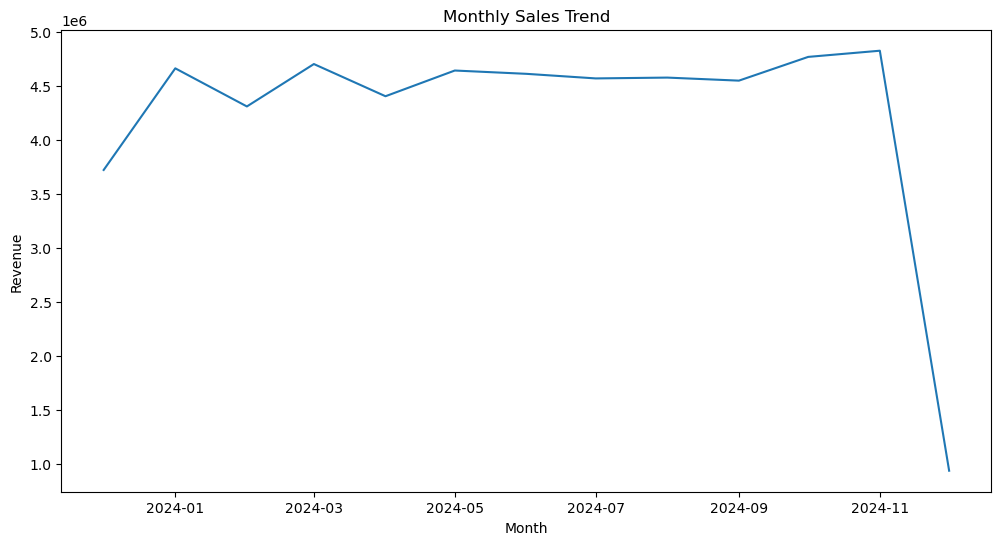

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.to_timestamp(), monthly_sales.values)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

In [19]:
# Top Selling Products
top_products = df.groupby('Product_ID')['Units_Sold'].sum().sort_values(ascending=False).head(10)

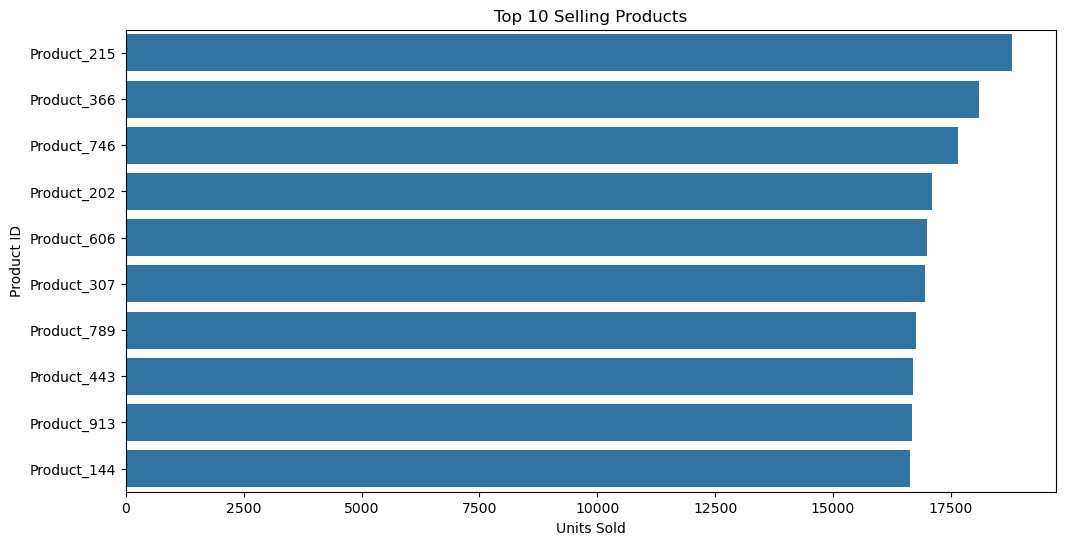

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Selling Products')
plt.xlabel('Units Sold')
plt.ylabel('Product ID')
plt.show()

In [21]:
# Customer Demographics
customer_demographics = df.groupby('Customer_ID')['Revenue'].sum()

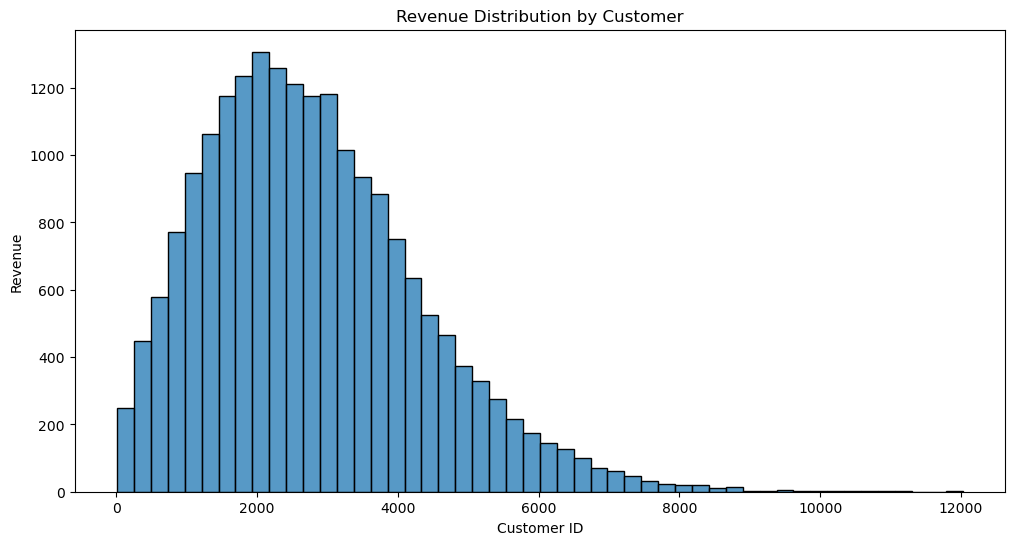

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(customer_demographics, bins=50)
plt.title('Revenue Distribution by Customer')
plt.xlabel('Customer ID')
plt.ylabel('Revenue')
plt.show()

In [23]:
# Ad Performance
ad_performance = df.groupby('Region')[['Clicks', 'Impressions', 'Ad_Spend']].sum()
ad_performance['Ad_CTR'] = (ad_performance['Clicks'] / ad_performance['Impressions']) * 100
ad_performance['Ad_CPC'] = ad_performance['Ad_Spend'] / ad_performance['Clicks']

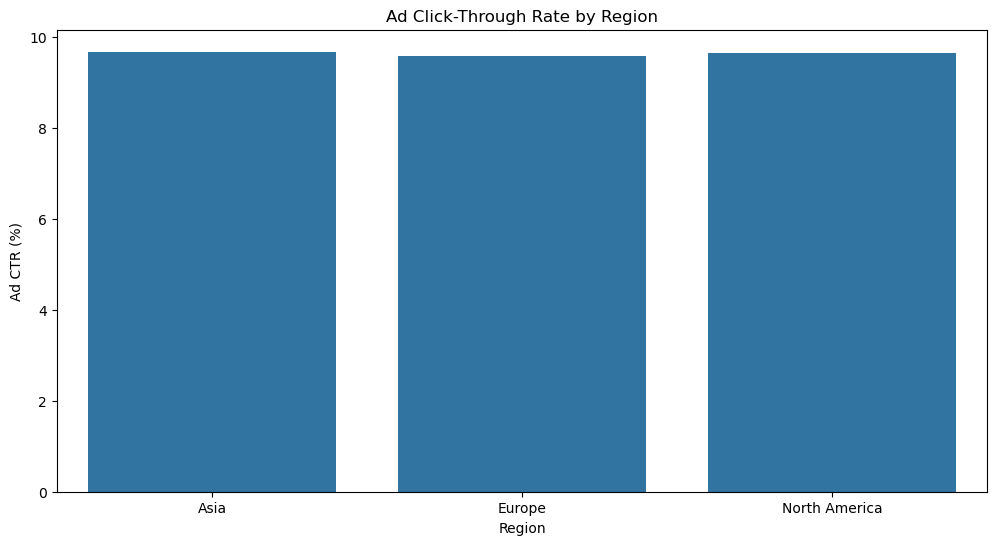

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x=ad_performance.index, y=ad_performance['Ad_CTR'])
plt.title('Ad Click-Through Rate by Region')
plt.xlabel('Region')
plt.ylabel('Ad CTR (%)')
plt.show()

In [25]:
# Predictive Analytics - Sales Forecasting (using ARIMA)
from statsmodels.tsa.arima.model import ARIMA

In [26]:
# Prepare the data
monthly_sales = df.groupby(pd.Grouper(key='Transaction_Date', freq='M'))['Revenue'].sum()

In [27]:
# Fit the model
model = ARIMA(monthly_sales, order=(5, 1, 0))
model_fit = model.fit()

In [28]:
# Forecast future sales
forecast = model_fit.forecast(steps=12)
forecast_index = pd.date_range(start=monthly_sales.index[-1], periods=12, freq='M')
forecast_series = pd.Series(forecast, index=forecast_index)

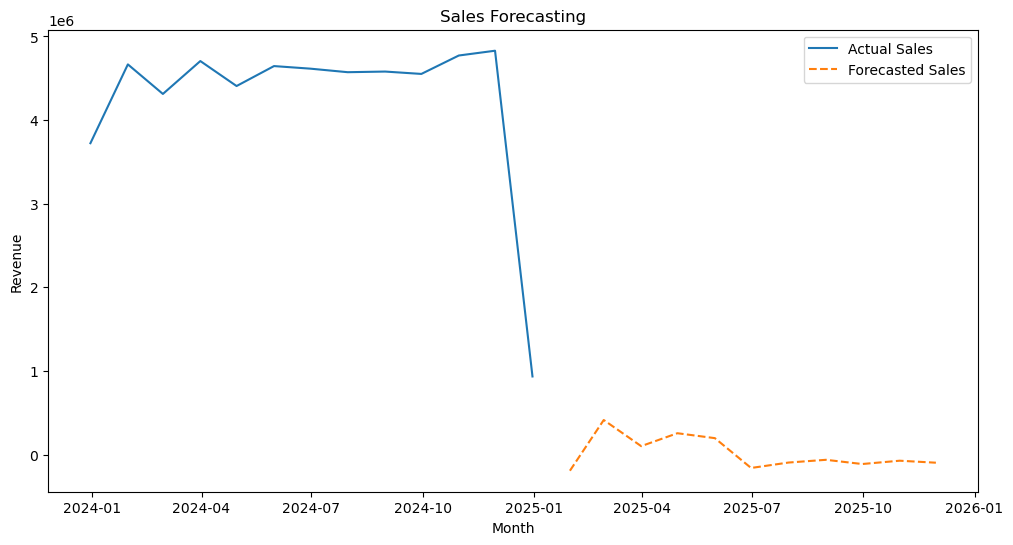

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, label='Actual Sales')
plt.plot(forecast_series.index, forecast_series.values, label='Forecasted Sales', linestyle='--')
plt.title('Sales Forecasting')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend()
plt.show()

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

# Create a pivot table
customer_product_matrix = df.pivot_table(index='Customer_ID', columns='Product_ID', values='Units_Sold', aggfunc='sum').fillna(0)

# Compute the cosine similarity matrix
product_similarity = cosine_similarity(customer_product_matrix.T)

# Recommend products for a given customer
def recommend_products(customer_id, n_recommendations=5):
    if customer_id not in customer_product_matrix.index:
        print(f"Customer ID {customer_id} not found in the dataset.")
        return []
    
    customer_purchases = customer_product_matrix.loc[customer_id]
    similar_products = product_similarity.dot(customer_purchases) / product_similarity.sum(axis=1)
    similar_products = pd.Series(similar_products, index=customer_product_matrix.columns)
    similar_products = similar_products.sort_values(ascending=False).head(n_recommendations)
    return similar_products.index.tolist()

# Example usage
customer_id = df['Customer_ID'].iloc[0]  # Replace with a valid customer ID from the dataset
recommended_products = recommend_products(customer_id)
print(f"Recommended products for customer {customer_id}: {recommended_products}")


Recommended products for customer Customer_65: ['Product_969', 'Product_252', 'Product_240', 'Product_224', 'Product_382']
